# Nome: Alberto Rodrigues Ferreira
# Matrícula: 391278

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sea

In [51]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
dados=pd.read_csv('gdrive/My Drive/DadosDeCarros2.csv')

In [53]:
dados.head()

,price,engine-size
0,13495,130
1,16500,130
2,16500,152
3,13950,109
4,17450,136


In [54]:
dados.describe()

,price,engine-size
count,201.000000,201.000000
mean,13207.129353,126.875622
std,7947.066342,41.546834
min,5118.000000,61.000000
25%,7775.000000,98.000000
50%,10295.000000,120.000000
75%,16500.000000,141.000000
max,45400.000000,326.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


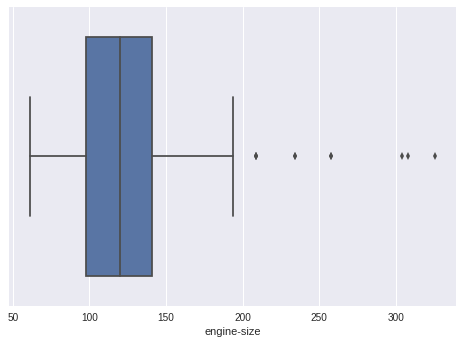

In [55]:
sea.boxplot(dados["engine-size"])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


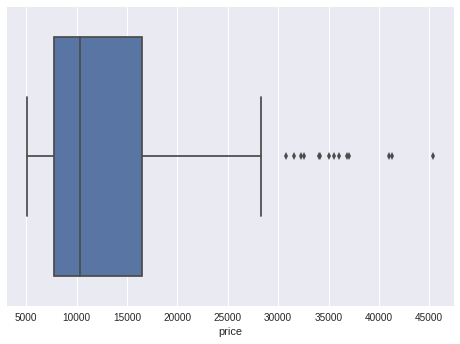

In [56]:
sea.boxplot(dados["price"])

In [0]:
X=np.column_stack((np.ones(dados.shape[0]),(dados["engine-size"].values)))

In [0]:
Y=dados["price"].values.astype("float")

In [59]:
from sklearn.preprocessing import scale
X[:,1]=scale(X[:,1]) 
print(np.mean(X[:,1]))
print(np.std(X[:,1]))

-3.755978391766699e-17
1.0


In [0]:
xtreino,xteste,ytreino,yteste=train_test_split(X,Y,test_size=0.3)
ytreino=ytreino.reshape(-1,1)
yteste=yteste.reshape(-1,1)

In [0]:
#Beta = tf.Variable(np.random.randn(),dtype=tf.float32)
#Ajeitar taxa e Epocas
Taxa=0.05
Epocas=2000
display_step=100

In [0]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
 
# Pesos e bias do modelo
Beta = tf.Variable(np.random.randn(xtreino.shape[1],1),dtype=tf.float32)

In [0]:
# Construindo o modelo linear
Modelo = tf.matmul(x,Beta)
 
# Mean squared error (erro quadrado médio)
Custo = tf.reduce_sum(tf.square(Modelo - y) / (2*dados.shape[0]))
 
# Otimização com Gradient descent
Treino = tf.train.GradientDescentOptimizer(Taxa).minimize(Custo)

In [64]:
init = tf.global_variables_initializer()
 
# Iniciando a sessão
with tf.Session() as sess:
    # Iniciando as variáveis
    sess.run(init)
    # Treinamento do modelo
    for epoch in range(Epocas):
        sess.run(Treino, feed_dict={x: xtreino, y: ytreino})
         
        # Display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(Custo, feed_dict={x: xtreino, y: ytreino})
            print(epoch+1, c, sess.run(Beta))

    # Imprimindo os parâmetros finais do modelo
    custo_treino = sess.run(Custo, feed_dict={x: xtreino, y: ytreino})
    print("Custo Final de Treinamento:", custo_treino, " Parâmetros:", sess.run(Beta))
    # Testando o modelo
    custo_teste = sess.run(tf.reduce_sum(tf.square(Modelo - y)) / (2 * xteste.shape[0]), feed_dict={x: xteste, y: yteste})
     
    print("Custo Final em Teste:", custo_teste)
    ypredito=sess.run(tf.matmul(xteste.astype("float32"),Beta) )

100 5021459.5 [[12836.769 ]
 [ 6806.5728]]
200 4973620.5 [[13184.229 ]
 [ 6885.0874]]
300 4973585.0 [[13194.068]
 [ 6885.171]]
400 4973584.5 [[13194.352 ]
 [ 6885.1353]]
500 4973584.5 [[13194.352 ]
 [ 6885.1353]]
600 4973584.5 [[13194.352 ]
 [ 6885.1353]]
700 4973584.5 [[13194.352 ]
 [ 6885.1353]]
800 4973584.5 [[13194.352 ]
 [ 6885.1353]]
900 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1000 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1100 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1200 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1300 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1400 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1500 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1600 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1700 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1800 4973584.5 [[13194.352 ]
 [ 6885.1353]]
1900 4973584.5 [[13194.352 ]
 [ 6885.1353]]
2000 4973584.5 [[13194.352 ]
 [ 6885.1353]]
Custo Final de Treinamento: 4973584.5  Parâmetros: [[13194.352 ]
 [ 6885.1353]]
Custo Final em Teste: 8361314.0


In [0]:
from sklearn.metrics import r2_score

In [0]:
r2=r2_score(yteste,ypredito)

In [67]:
r2

0.6806357235055648

In [68]:
np.column_stack((yteste,ypredito))

array([[ 7198.        ,  8397.13964844],
       [ 7995.        ,  8231.00585938],
       [ 8249.        ,  8231.00585938],
       [ 8949.        , 12052.07910156],
       [15580.        , 12052.07910156],
       [ 9495.        ,  8231.00585938],
       [ 6295.        ,  7068.07080078],
       [ 7295.        ,  7400.33740234],
       [10945.        ,  3745.39770508],
       [ 9988.        , 12384.34667969],
       [ 6989.        , 12384.34667969],
       [18280.        , 15374.75195312],
       [35056.        , 30991.31445312],
       [ 5389.        ,  7400.33740234],
       [17669.        , 16371.55371094],
       [ 7126.        , 10058.47558594],
       [ 7775.        ,  8231.00585938],
       [18620.        , 12218.21289062],
       [13645.        ,  3745.39770508],
       [20970.        , 19361.95898438],
       [13499.        , 22186.23242188],
       [ 6669.        ,  7400.33740234],
       [ 9989.        , 16371.55371094],
       [ 7799.        ,  8231.00585938],
       [ 8499.  

In [69]:
np.mean((ypredito-yteste)**2)

16722629.024372457